In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#Test set image processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17602 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [4]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/trained_plant_disease0007.keras')

# Visualising and Performing Prediction on Single image

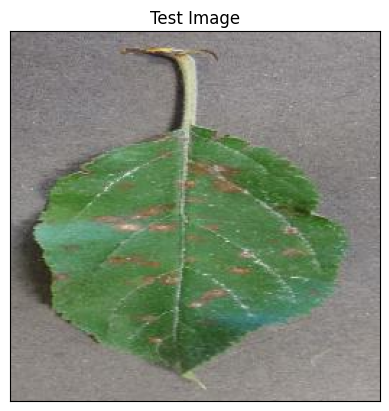

In [35]:
import cv2
image_path = '/content/drive/MyDrive/test/test/AppleCedarRust2.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [36]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 58ms/step


In [37]:
print(predictions)

[[7.0282638e-08 7.2888326e-08 9.9999261e-01 2.8700128e-10 1.9725148e-09
  2.9969733e-08 1.2697808e-11 9.3275204e-08 3.8968324e-13 6.5987757e-09
  6.0628124e-15 1.1556130e-07 1.2364443e-09 1.1757857e-10 8.6627627e-10
  3.0714755e-08 1.3898814e-07 1.3421180e-11 2.2816716e-06 2.8725771e-09
  3.3258367e-08 3.2644729e-07 2.4915623e-09 4.0504888e-09 9.8503965e-12
  2.8761103e-11 1.5038372e-08 3.7924275e-11 3.6179631e-07 3.0971438e-07
  7.2057765e-10 6.2124106e-09 3.4210618e-06 2.2752297e-11 9.5020241e-08
  1.8967744e-10 3.4467029e-10 6.0704419e-10]]


In [38]:
result_index = np.argmax(predictions)
print(result_index)

2


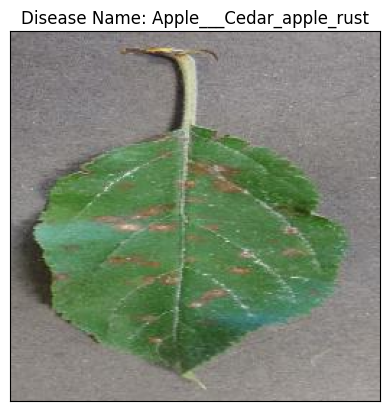

In [39]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()